In [1]:
import pandas as pd
import numpy as np
from bioreactor.plotting import *
from bioreactor.use_colors import *
from bioreactor.annotation import *
from bioreactor.utils import read_dataset, median_scale
from bioreactor.ssgsea import *
from bioreactor.gsea import *
from bioreactor.expression import  *
from bioreactor.pathway_scoring import *
from bioreactor.survival import * 
from bioreactor.graphs import *

import pickle

from bioreactor.plotting import *
from bioreactor.use_colors import *
from bioreactor.utils import *
from bioreactor.gsea import *
from bioreactor.mutations import *
from bioreactor.ssgsea import *
from bioreactor.clustering import *
from bioreactor.oncoplot2 import *
from bioreactor.cna import *

from typing import Tuple, List, Optional
import warnings
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import os
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

%config InlineBackend.figure_format = 'svg'
plt.rcParams['pdf.fonttype'] = 'truetype'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['figure.dpi'] = 200
plt.rcParams['svg.fonttype'] = 'none'

sns.set_style('ticks')
sns.axes_style('white')

{'figure.facecolor': 'white',
 'axes.labelcolor': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'axes.axisbelow': True,
 'grid.linestyle': '-',
 'text.color': '.15',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'xtick.top': False,
 'ytick.right': False,
 'axes.grid': False,
 'axes.facecolor': 'white',
 'axes.edgecolor': '.15',
 'grid.color': '.8',
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'xtick.bottom': False,
 'ytick.left': False}

In [2]:
annot_reprod_ldt = read_dataset('/uftp/projects/samples_with_replicates/data/ann.tsv')

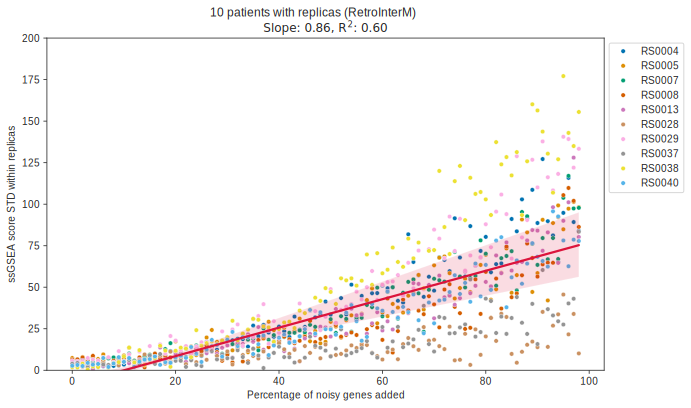

In [3]:
regression_data = read_dataset('noise_gene_data_10_noisy.tsv',sep='\t')

# Линейная регрессия
X = sm.add_constant(regression_data['percentage'].astype(float))
y = regression_data['ssgsea_score_STD'].astype(float)
model = sm.OLS(y, X).fit()
slope = model.params[1]
r_squared = model.rsquared


plt.figure(figsize=(10, 6))
sns.scatterplot(data=regression_data, x='percentage', y='ssgsea_score_STD', hue='Case', s=20, palette='colorblind')
sns.regplot(data=regression_data, x='percentage', y='ssgsea_score_STD', scatter=False, color='crimson',ci=95, seed=42,  units='Case')

plt.legend(bbox_to_anchor=(1, 1))
plt.ylim(0, 200)
plt.xlabel('Percentage of noisy genes added')
plt.ylabel('ssGSEA score STD within replicas')
plt.title(f'10 patients with replicas (RetroInterM)\nSlope: {slope:.2f}, $R^2$: {r_squared:.2f}')
plt.savefig('noise_gene_data_10_noisy_scatter.svg', format='svg')
plt.show()

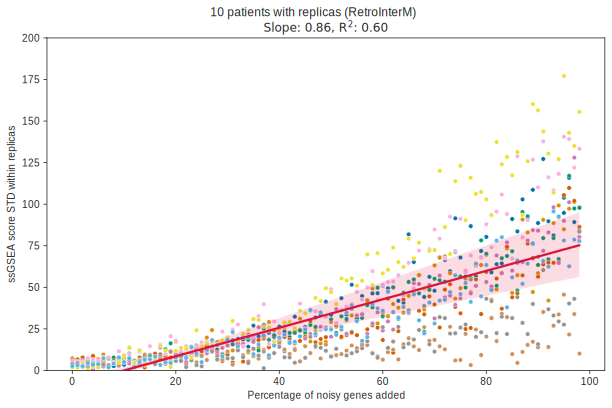

In [4]:
regression_data = read_dataset('noise_gene_data_10_noisy.tsv',sep='\t')

# Линейная регрессия
X = sm.add_constant(regression_data['percentage'].astype(float))
y = regression_data['ssgsea_score_STD'].astype(float)
model = sm.OLS(y, X).fit()
slope = model.params[1]
r_squared = model.rsquared


plt.figure(figsize=(10, 6))
sns.scatterplot(data=regression_data, x='percentage', y='ssgsea_score_STD', hue='Case', s=20, palette='colorblind', legend=False)
sns.regplot(data=regression_data, x='percentage', y='ssgsea_score_STD', scatter=False, color='crimson',ci=95, seed=42,  units='Case')

plt.ylim(0, 200)
plt.xlabel('Percentage of noisy genes added')
plt.ylabel('ssGSEA score STD within replicas')
plt.title(f'10 patients with replicas (RetroInterM)\nSlope: {slope:.2f}, $R^2$: {r_squared:.2f}')
plt.savefig('no_legend_noise_gene_data_10_noisy_scatter.svg', format='svg')
plt.show()

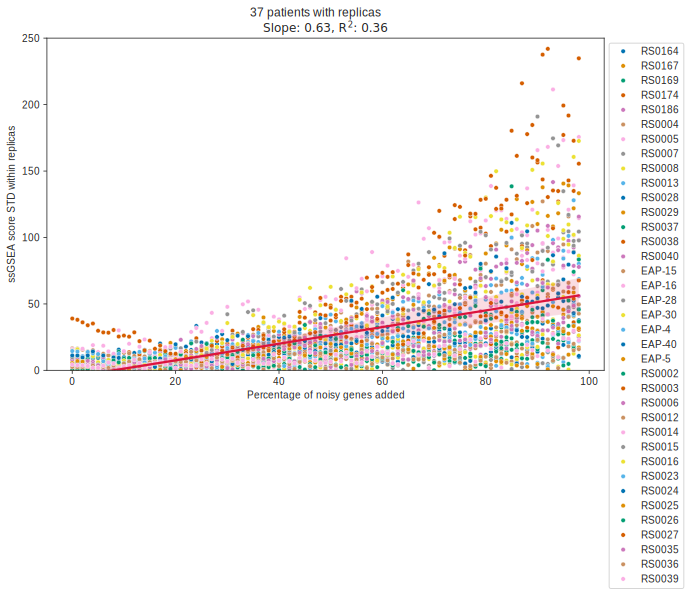

In [18]:
regression_data = read_dataset('noise_gene_data_37_noisy.tsv',sep='\t')

# Линейная регрессия
X = sm.add_constant(regression_data['percentage'].astype(float))
y = regression_data['ssgsea_score_STD'].astype(float)
model = sm.OLS(y, X).fit()
slope = model.params[1]
r_squared = model.rsquared


plt.figure(figsize=(10, 6))
sns.scatterplot(data=regression_data, x='percentage', y='ssgsea_score_STD', hue='Case', s=20, palette='colorblind')
sns.regplot(data=regression_data, x='percentage', y='ssgsea_score_STD', scatter=False, color='crimson',ci=95, seed=42,  units='Case')

plt.legend(bbox_to_anchor=(1, 1))
plt.ylim(0, 250)
plt.xlabel('Percentage of noisy genes added')
plt.ylabel('ssGSEA score STD within replicas')
plt.title(f'37 patients with replicas \nSlope: {slope:.2f}, $R^2$: {r_squared:.2f}')
plt.savefig('noise_gene_data_37_noisy_scatter.svg', format='svg')
plt.show()

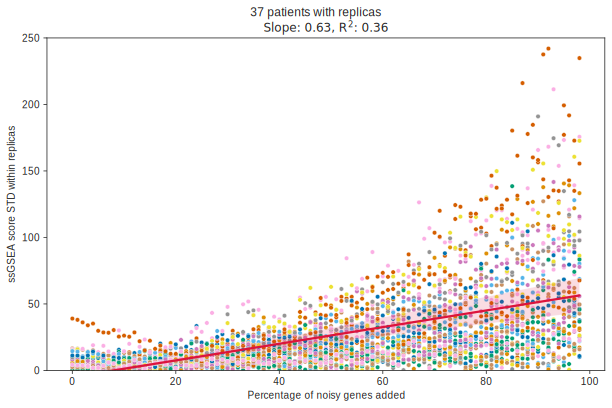

In [19]:
regression_data = read_dataset('noise_gene_data_37_noisy.tsv',sep='\t')

# Линейная регрессия
X = sm.add_constant(regression_data['percentage'].astype(float))
y = regression_data['ssgsea_score_STD'].astype(float)
model = sm.OLS(y, X).fit()
slope = model.params[1]
r_squared = model.rsquared


plt.figure(figsize=(10, 6))
sns.scatterplot(data=regression_data, x='percentage', y='ssgsea_score_STD', hue='Case', s=20, palette='colorblind', legend=False)
sns.regplot(data=regression_data, x='percentage', y='ssgsea_score_STD', scatter=False, color='crimson',ci=95, seed=42,  units='Case')

plt.ylim(0, 250)
plt.xlabel('Percentage of noisy genes added')
plt.ylabel('ssGSEA score STD within replicas')
plt.title(f'37 patients with replicas \nSlope: {slope:.2f}, $R^2$: {r_squared:.2f}')
plt.savefig('no_legend_noise_gene_data_37_noisy_scatter.svg', format='svg')
plt.show()

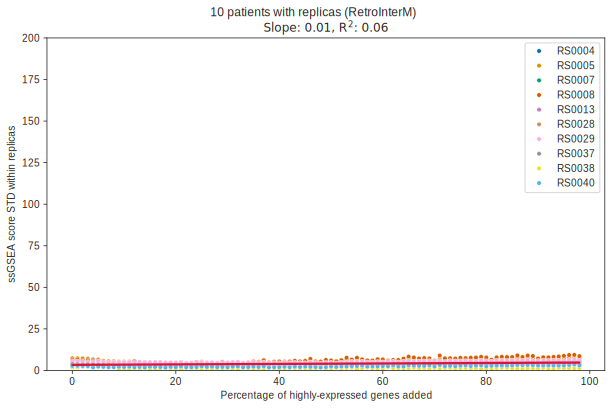

In [7]:
regression_data = read_dataset('noise_gene_data_10_highly.tsv',sep='\t')

# Линейная регрессия
X = sm.add_constant(regression_data['percentage'].astype(float))
y = regression_data['ssgsea_score_STD'].astype(float)
model = sm.OLS(y, X).fit()
slope = model.params[1]
r_squared = model.rsquared


plt.figure(figsize=(10, 6))
sns.scatterplot(data=regression_data, x='percentage', y='ssgsea_score_STD', hue='Case', s=20, palette='colorblind')
sns.regplot(data=regression_data, x='percentage', y='ssgsea_score_STD', scatter=False, color='crimson',ci=95, seed=42,  units='Case')

plt.legend(bbox_to_anchor=(1, 1))
plt.ylim(0, 200)
plt.xlabel('Percentage of highly-expressed genes added')
plt.ylabel('ssGSEA score STD within replicas')
plt.title(f'10 patients with replicas (RetroInterM)\nSlope: {slope:.2f}, $R^2$: {r_squared:.2f}')
plt.savefig('noise_gene_data_10_highly_scatter.svg', format='svg')
plt.show()

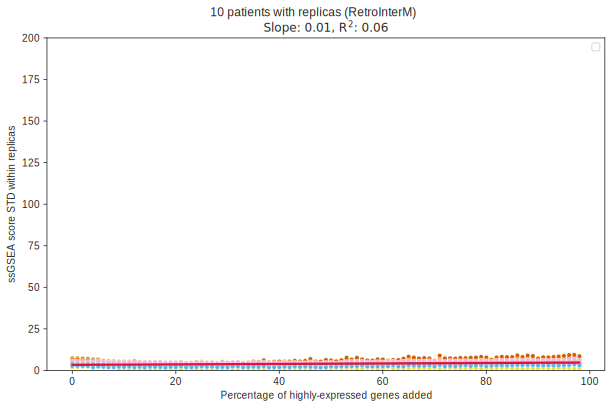

In [8]:
regression_data = read_dataset('noise_gene_data_10_highly.tsv',sep='\t')

# Линейная регрессия
X = sm.add_constant(regression_data['percentage'].astype(float))
y = regression_data['ssgsea_score_STD'].astype(float)
model = sm.OLS(y, X).fit()
slope = model.params[1]
r_squared = model.rsquared


plt.figure(figsize=(10, 6))
sns.scatterplot(data=regression_data, x='percentage', y='ssgsea_score_STD', hue='Case', s=20, palette='colorblind', legend=False)
sns.regplot(data=regression_data, x='percentage', y='ssgsea_score_STD', scatter=False, color='crimson',ci=95, seed=42,  units='Case')

plt.legend(bbox_to_anchor=(1, 1))
plt.ylim(0, 200)
plt.xlabel('Percentage of highly-expressed genes added')
plt.ylabel('ssGSEA score STD within replicas')
plt.title(f'10 patients with replicas (RetroInterM)\nSlope: {slope:.2f}, $R^2$: {r_squared:.2f}')
plt.savefig('no_legend_noise_gene_data_10_highly_scatter.svg', format='svg')
plt.show()

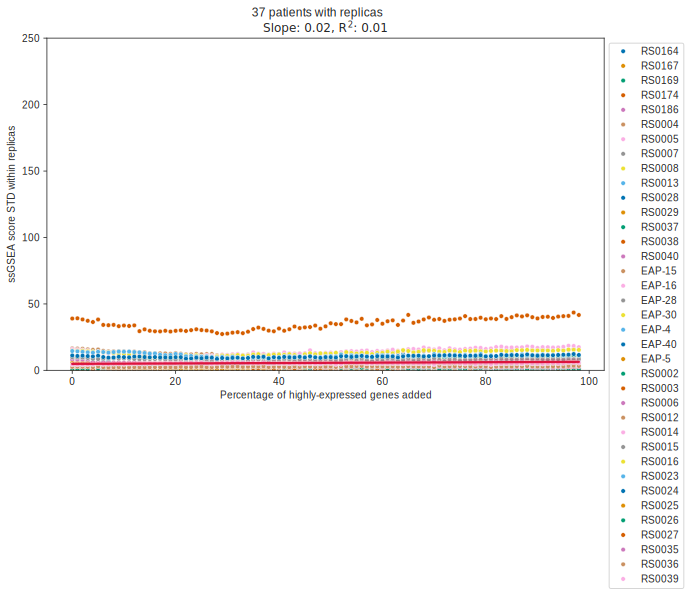

In [20]:
regression_data = read_dataset('noise_gene_data_37_highly.tsv',sep='\t')

# Линейная регрессия
X = sm.add_constant(regression_data['percentage'].astype(float))
y = regression_data['ssgsea_score_STD'].astype(float)
model = sm.OLS(y, X).fit()
slope = model.params[1]
r_squared = model.rsquared


plt.figure(figsize=(10, 6))
sns.scatterplot(data=regression_data, x='percentage', y='ssgsea_score_STD', hue='Case', s=20, palette='colorblind')
sns.regplot(data=regression_data, x='percentage', y='ssgsea_score_STD', scatter=False, color='crimson',ci=95, seed=42,  units='Case')

plt.legend(bbox_to_anchor=(1, 1))
plt.ylim(0, 250)
plt.xlabel('Percentage of highly-expressed genes added')
plt.ylabel('ssGSEA score STD within replicas')
plt.title(f'37 patients with replicas\nSlope: {slope:.2f}, $R^2$: {r_squared:.2f}')
plt.savefig('noise_gene_data_37_highly_scatter.svg', format='svg')
plt.show()

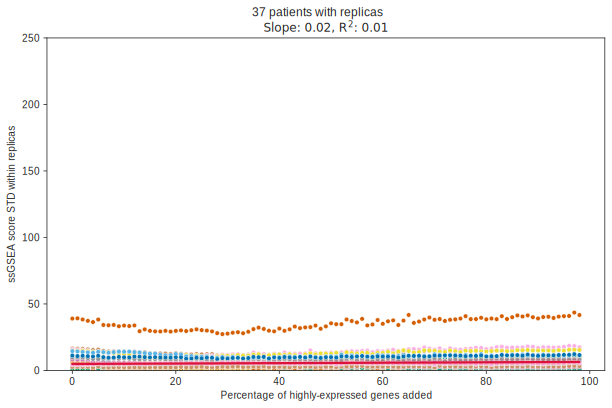

In [21]:
regression_data = read_dataset('noise_gene_data_37_highly.tsv',sep='\t')

# Линейная регрессия
X = sm.add_constant(regression_data['percentage'].astype(float))
y = regression_data['ssgsea_score_STD'].astype(float)
model = sm.OLS(y, X).fit()
slope = model.params[1]
r_squared = model.rsquared


plt.figure(figsize=(10, 6))
sns.scatterplot(data=regression_data, x='percentage', y='ssgsea_score_STD', hue='Case', s=20, palette='colorblind', legend=False)
sns.regplot(data=regression_data, x='percentage', y='ssgsea_score_STD', scatter=False, color='crimson',ci=95, seed=42,  units='Case')

plt.ylim(0, 250)
plt.xlabel('Percentage of highly-expressed genes added')
plt.ylabel('ssGSEA score STD within replicas')
plt.title(f'37 patients with replicas\nSlope: {slope:.2f}, $R^2$: {r_squared:.2f}')
plt.savefig('no_legend_noise_gene_data_37_highly_scatter.svg', format='svg')
plt.show()

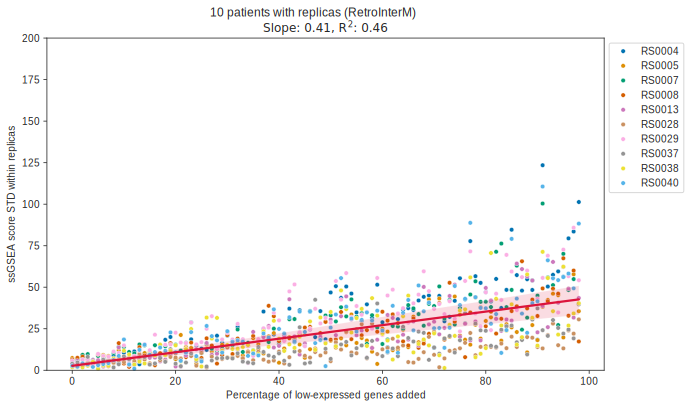

In [11]:
regression_data = read_dataset('noise_gene_data_10_low.tsv',sep='\t')

# Линейная регрессия
X = sm.add_constant(regression_data['percentage'].astype(float))
y = regression_data['ssgsea_score_STD'].astype(float)
model = sm.OLS(y, X).fit()
slope = model.params[1]
r_squared = model.rsquared


plt.figure(figsize=(10, 6))
sns.scatterplot(data=regression_data, x='percentage', y='ssgsea_score_STD', hue='Case', s=20, palette='colorblind')
sns.regplot(data=regression_data, x='percentage', y='ssgsea_score_STD', scatter=False, color='crimson',ci=95, seed=42,  units='Case')

plt.legend(bbox_to_anchor=(1, 1))
plt.ylim(0, 200)
plt.xlabel('Percentage of low-expressed genes added')
plt.ylabel('ssGSEA score STD within replicas')
plt.title(f'10 patients with replicas (RetroInterM)\nSlope: {slope:.2f}, $R^2$: {r_squared:.2f}')
plt.savefig('noise_gene_data_10_low_scatter.svg', format='svg')
plt.show()

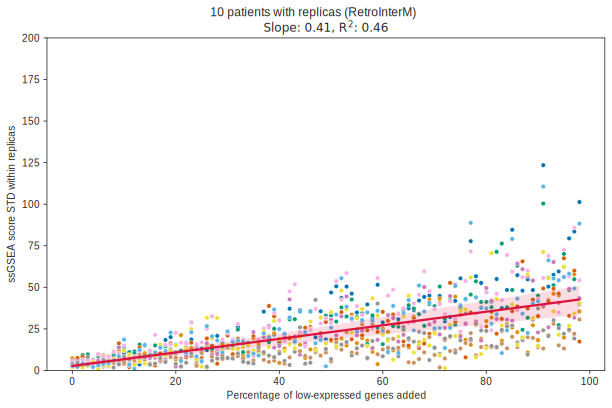

In [12]:
regression_data = read_dataset('noise_gene_data_10_low.tsv',sep='\t')

# Линейная регрессия
X = sm.add_constant(regression_data['percentage'].astype(float))
y = regression_data['ssgsea_score_STD'].astype(float)
model = sm.OLS(y, X).fit()
slope = model.params[1]
r_squared = model.rsquared


plt.figure(figsize=(10, 6))
sns.scatterplot(data=regression_data, x='percentage', y='ssgsea_score_STD', hue='Case', s=20, palette='colorblind', legend=False)
sns.regplot(data=regression_data, x='percentage', y='ssgsea_score_STD', scatter=False, color='crimson',ci=95, seed=42,  units='Case')

plt.ylim(0, 200)
plt.xlabel('Percentage of low-expressed genes added')
plt.ylabel('ssGSEA score STD within replicas')
plt.title(f'10 patients with replicas (RetroInterM)\nSlope: {slope:.2f}, $R^2$: {r_squared:.2f}')
plt.savefig('no_legend_noise_gene_data_10_low_scatter.svg', format='svg')
plt.show()

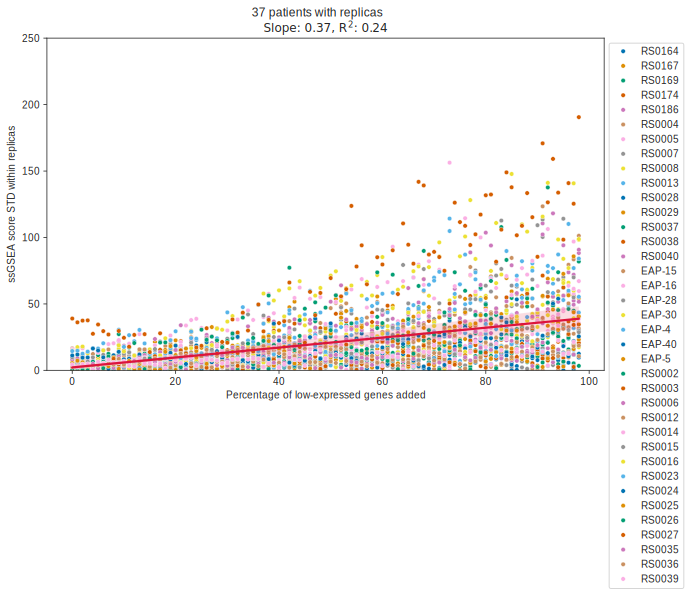

In [22]:
regression_data = read_dataset('noise_gene_data_37_low.tsv',sep='\t')

# Линейная регрессия
X = sm.add_constant(regression_data['percentage'].astype(float))
y = regression_data['ssgsea_score_STD'].astype(float)
model = sm.OLS(y, X).fit()
slope = model.params[1]
r_squared = model.rsquared


plt.figure(figsize=(10, 6))
sns.scatterplot(data=regression_data, x='percentage', y='ssgsea_score_STD', hue='Case', s=20, palette='colorblind')
sns.regplot(data=regression_data, x='percentage', y='ssgsea_score_STD', scatter=False, color='crimson',ci=95, seed=42,  units='Case')

plt.legend(bbox_to_anchor=(1, 1))
plt.ylim(0, 250)
plt.xlabel('Percentage of low-expressed genes added')
plt.ylabel('ssGSEA score STD within replicas')
plt.title(f'37 patients with replicas\nSlope: {slope:.2f}, $R^2$: {r_squared:.2f}')
plt.savefig('noise_gene_data_37_low_scatter.svg', format='svg')
plt.show()

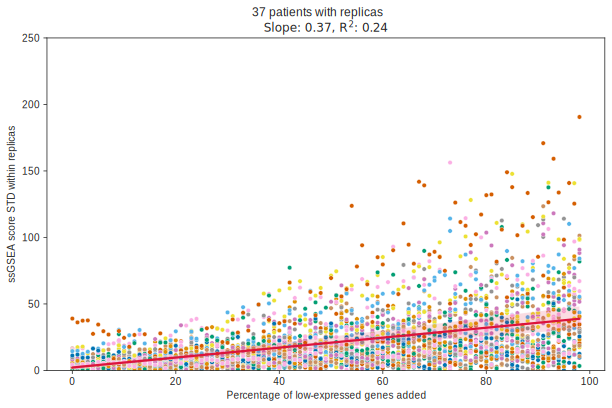

In [23]:
regression_data = read_dataset('noise_gene_data_37_low.tsv',sep='\t')

# Линейная регрессия
X = sm.add_constant(regression_data['percentage'].astype(float))
y = regression_data['ssgsea_score_STD'].astype(float)
model = sm.OLS(y, X).fit()
slope = model.params[1]
r_squared = model.rsquared


plt.figure(figsize=(10, 6))
sns.scatterplot(data=regression_data, x='percentage', y='ssgsea_score_STD', hue='Case', s=20, palette='colorblind', legend=False)
sns.regplot(data=regression_data, x='percentage', y='ssgsea_score_STD', scatter=False, color='crimson',ci=95, seed=42,  units='Case')

plt.ylim(0, 250)
plt.xlabel('Percentage of low-expressed genes added')
plt.ylabel('ssGSEA score STD within replicas')
plt.title(f'37 patients with replicas\nSlope: {slope:.2f}, $R^2$: {r_squared:.2f}')
plt.savefig('no_legend_noise_gene_data_37_low_scatter.svg', format='svg')
plt.show()